<a href="https://colab.research.google.com/github/judeyamoah/Cybersecurity/blob/main/group_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries needed
import pandas as pd
import numpy as np

#read dataset into data variable
data = pd.read_csv('/content/winequality-white.csv', sep=';')

#print the head info of our dataset
print(data.head())




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [ ]:
#1. get alll outliers
# Identify outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

print(outliers.sum())



1040


In [ ]:

#2. gell missing values
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#find duplicates
duplicates = data.duplicated().sum()
print(duplicates)

937


In [ ]:
#inconsistencies
inconsistencies = data['fixed acidity'].apply(lambda x: x < 0 or x > 20).sum()
print(inconsistencies)


0


In [ ]:
#part 2 of question
data_cleaned = data.copy()

#remove outliers
data_cleaned = data_cleaned[~outliers]

#remove missing values
data_cleaned = data_cleaned.dropna()

#remove duplicate
data_cleaned = data_cleaned.drop_duplicates(inplace=False, keep='last')

#remove inconsistencies
data_cleaned = data_cleaned[data_cleaned['fixed acidity'] >= 0]
data_cleaned = data_cleaned[data_cleaned['fixed acidity'] >= 0]

print("Original data shape:", data.shape)
print("Data cleaned shape:", data_cleaned)



Original data shape: (4898, 12)
Data cleaned shape:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38       

In [ ]:
data_iot = pd.read_csv('/content/RT_IOT2022', sep=',')

data_iot.head()

#Step 7: Handle Inconsistencies in Categorical Data
# Check unique values in categorical columns
for column in data_iot.select_dtypes(include='object').columns:
  print(f"Unique values in {column}: {data_iot[column].unique()}")

Unique values in proto: ['tcp' 'udp' 'icmp']
Unique values in service: ['mqtt' '-' 'http' 'dns' 'ntp' 'ssl' 'dhcp' 'irc' 'ssh' 'radius']
Unique values in Attack_type: ['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']


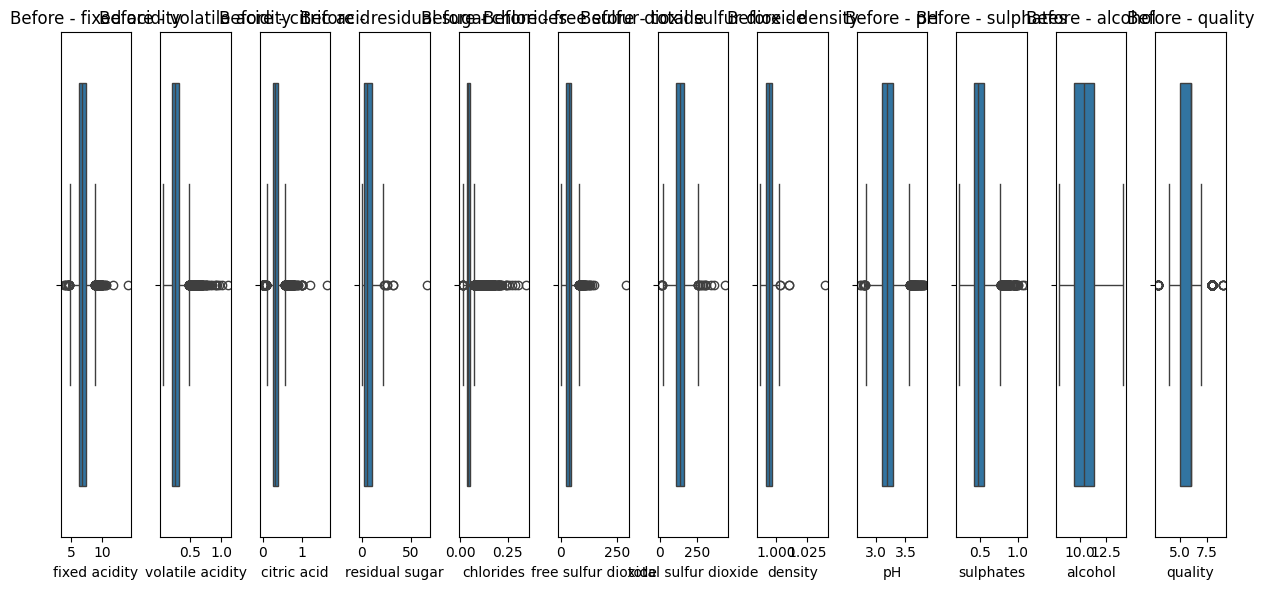

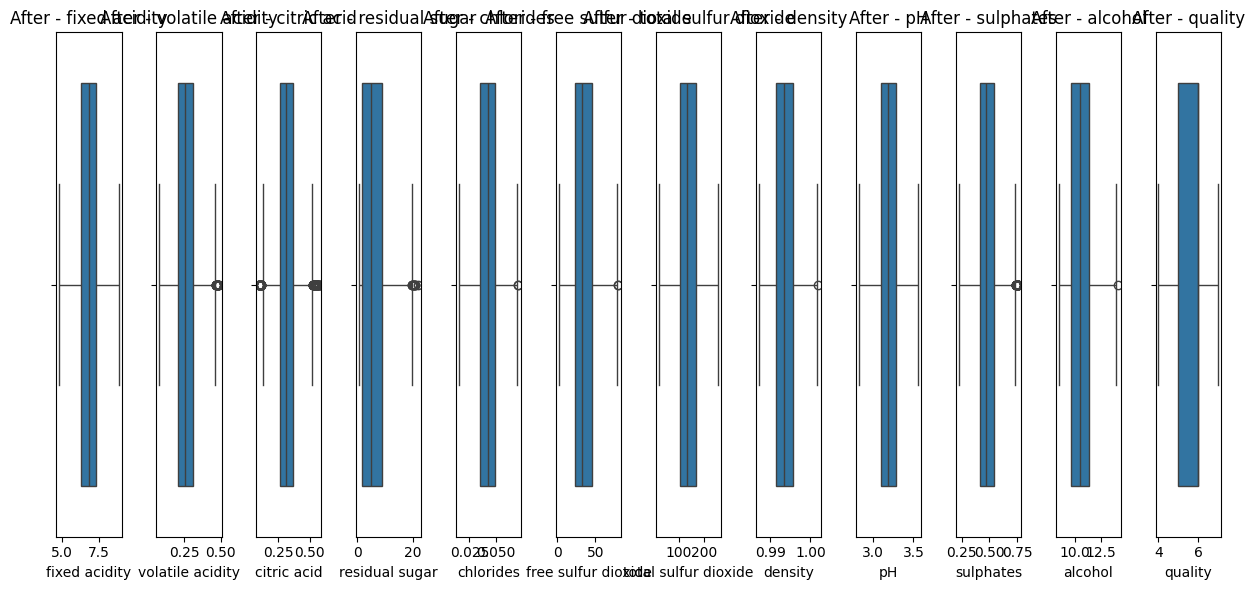

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Make sure to import seaborn as well

#Step 12: Optional - Visualize Data (Boxplot for Outliers)
# Boxplot before removing outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(1, len(data.select_dtypes(include=np.number).columns), i+1)
    sns.boxplot(x=data[column])
    plt.title(f"Before - {column}")

plt.tight_layout()
plt.show()

# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(data_cleaned.select_dtypes(include=np.number).columns):
    plt.subplot(1, len(data_cleaned.select_dtypes(include=np.number).columns), i+1)
    sns.boxplot(x=data_cleaned[column])
    plt.title(f"After - {column}")

plt.tight_layout()
plt.show()

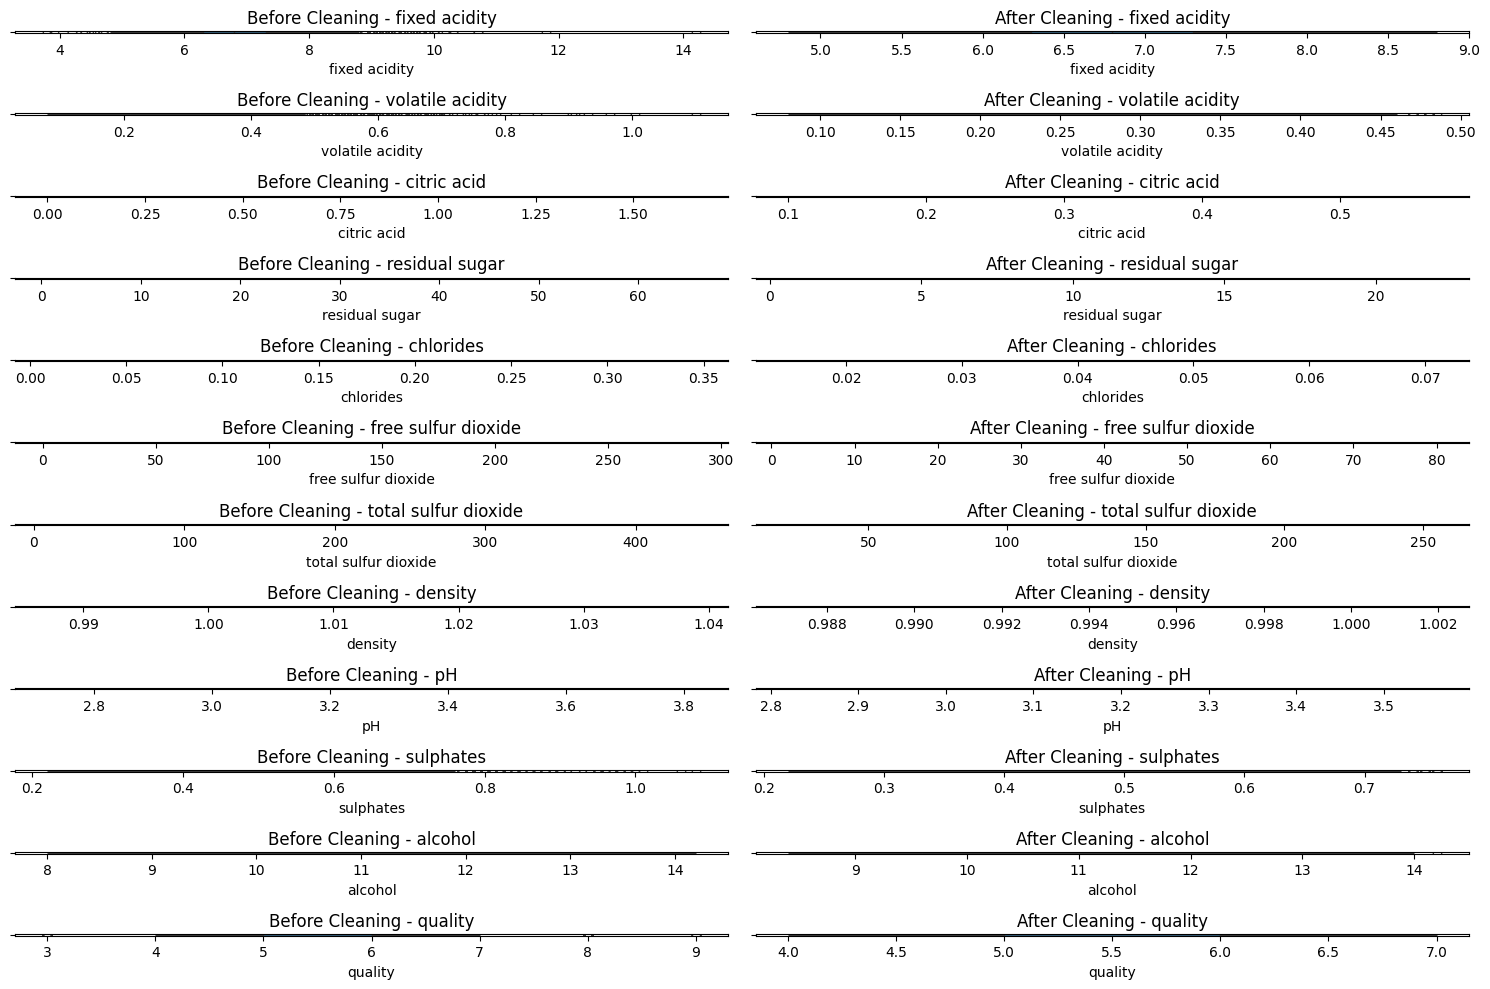

In [ ]:
# prompt: generate boxplot for before data was cleaned against after beint cleand to check for outliers if they were really cleand

import matplotlib.pyplot as plt
import numpy as np
# Assuming you have 'data' and 'data_cleaned' DataFrames as defined in your code

# Create a figure with subplots for each numeric column
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.select_dtypes(include=np.number).columns):
  plt.subplot(len(data.select_dtypes(include=np.number).columns), 2, 2 * i + 1)
  sns.boxplot(x=data[column])
  plt.title(f"Before Cleaning - {column}")

for i, column in enumerate(data_cleaned.select_dtypes(include=np.number).columns):
  plt.subplot(len(data_cleaned.select_dtypes(include=np.number).columns), 2, 2 * i + 2)
  sns.boxplot(x=data_cleaned[column])
  plt.title(f"After Cleaning - {column}")

plt.tight_layout()
plt.show()


